In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("stock_july2025.csv")
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,2025-06-01,AAPL,185.96,187.79,188.85,183.74,42257183,2.931356e+12,28.37,0.49,6.62,248.20,155.68,Technology
1,2025-06-01,ABBV,189.63,193.64,194.31,188.03,33074970,3.289227e+11,16.74,3.51,11.57,210.83,127.91,Healthcare
2,2025-06-01,ABT,118.79,120.08,120.53,118.01,17130934,2.001333e+11,19.39,1.84,6.19,140.79,99.26,Healthcare
3,2025-06-01,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology
4,2025-06-01,ADP,253.46,255.60,258.59,249.91,10319559,1.052471e+11,29.92,2.04,8.54,303.75,234.28,Financials


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13  Sector          4346 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 475.5+ KB


In [6]:
df.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64

In [7]:
df.dtypes

Date               object
Ticker             object
Open Price        float64
Close Price       float64
High Price        float64
Low Price         float64
Volume Traded       int64
Market Cap        float64
PE Ratio          float64
Dividend Yield    float64
EPS               float64
52 Week High      float64
52 Week Low       float64
Sector             object
dtype: object

C:\Users\hp\AppData\Local\Temp\ipykernel_18888\3175792856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sector", y="PE Ratio", palette="coolwarm")


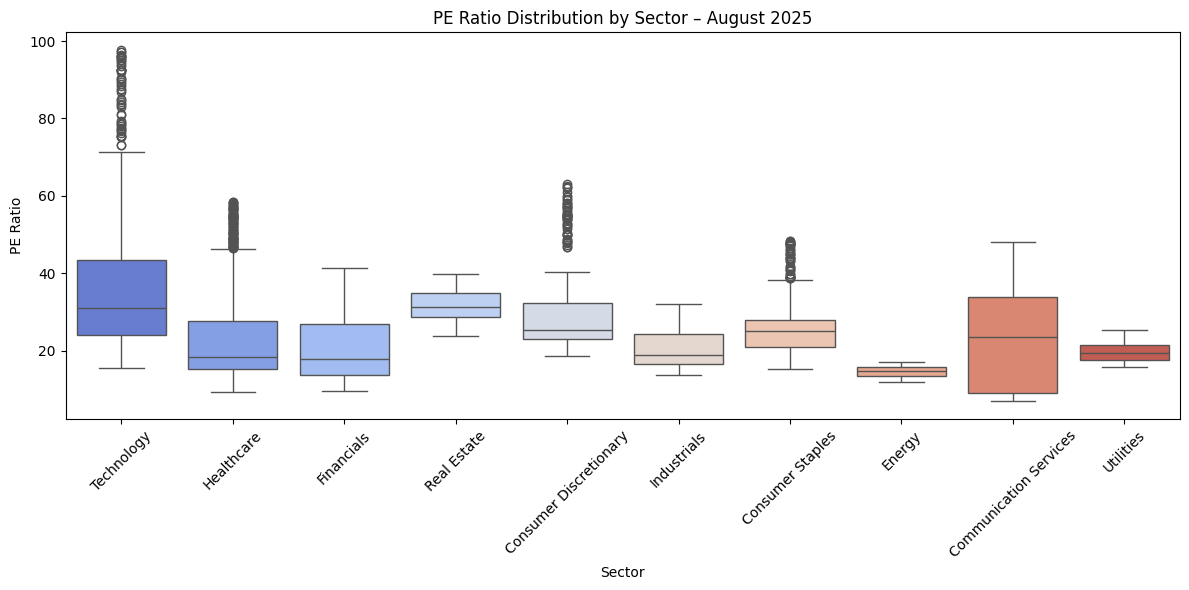

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Sector", y="PE Ratio", palette="coolwarm")
plt.title("PE Ratio Distribution by Sector – August 2025")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

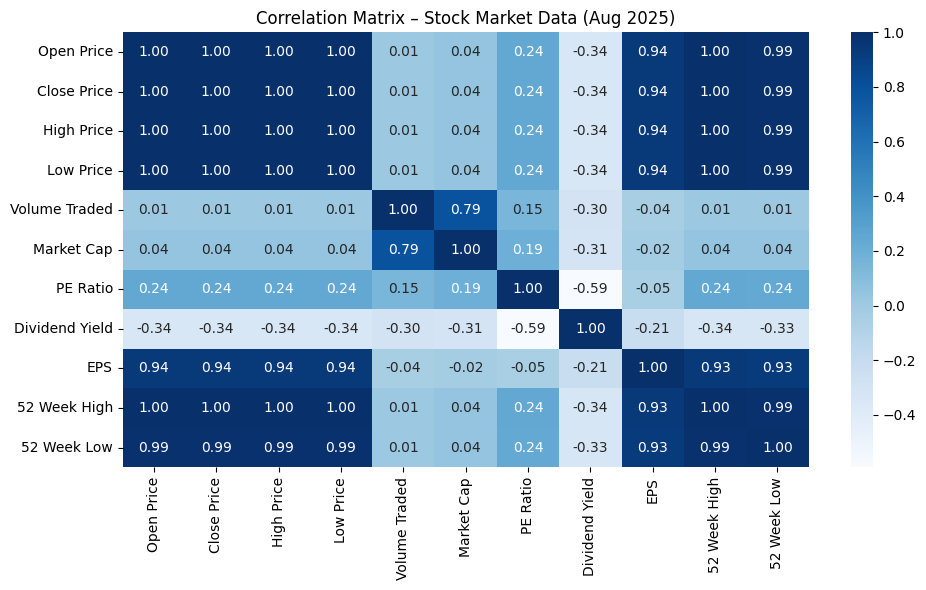

In [9]:
plt.figure(figsize=(10, 6))
numeric_cols = ["Open Price", "Close Price", "High Price", "Low Price", 
                "Volume Traded", "Market Cap", "PE Ratio", 
                "Dividend Yield", "EPS", "52 Week High", "52 Week Low"]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix – Stock Market Data (Aug 2025)")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)

In [11]:
df.dtypes

Date              datetime64[ns]
Ticker                    object
Open Price               float64
Close Price              float64
High Price               float64
Low Price                float64
Volume Traded              int64
Market Cap               float64
PE Ratio                 float64
Dividend Yield           float64
EPS                      float64
52 Week High             float64
52 Week Low              float64
Sector                    object
day                        int32
weekday                    int32
is_month_start             int32
dtype: object

In [15]:
expected_cols = ['Date', 'Ticker', 'Open Price', 'Close Price', 'High Price',
                 'Low Price', 'Volume Traded', 'Market Cap', 'PE Ratio',
                 'Dividend Yield', 'EPS', '52 Week High', '52 Week Low', 'Sector']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")
df = df.sort_values(['Ticker', 'Date']).reset_index(drop=True)
df['prev_close'] = df.groupby('Ticker')['Close Price'].shift(1)
df['prev_volume'] = df.groupby('Ticker')['Volume Traded'].shift(1)
df['ma_3'] = df.groupby('Ticker')['Close Price'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df['daily_return'] = (df['Close Price'] - df['Open Price']) / df['Open Price']
df['range_pct'] = (df['High Price'] - df['Low Price']) / df['Low Price'].replace(0, np.nan)
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
df['Target'] = (df['Close Price'] > df['prev_close']).astype(int)
df = df.dropna(subset=['prev_close']).reset_index(drop=True)

feature_cols = [
    'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume Traded',
    'Market Cap', 'PE Ratio', 'Dividend Yield', 'EPS', '52 Week High', '52 Week Low',
    'prev_close', 'prev_volume', 'ma_3', 'daily_return', 'range_pct',
    'day', 'weekday', 'is_month_start',
    'Ticker', 'Sector'
]

X = df[feature_cols].copy()
y = df['Target'].copy()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
le_ticker = LabelEncoder()
le_sector = LabelEncoder()
X['Ticker'] = le_ticker.fit_transform(X['Ticker'])
X['Sector'] = le_sector.fit_transform(X['Sector'].astype(str))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)



=== LogisticRegression ===
Test Accuracy: 72.68%
Precision: 73.91% | Recall: 70.32% | F1: 72.07%
5-fold CV Accuracy (train): 71.19% (+/- 1.18%)

Classification report (test):
              precision    recall  f1-score   support

           0     0.7156    0.7506    0.7327       409
           1     0.7391    0.7032    0.7207       411

    accuracy                         0.7268       820
   macro avg     0.7274    0.7269    0.7267       820
weighted avg     0.7274    0.7268    0.7267       820



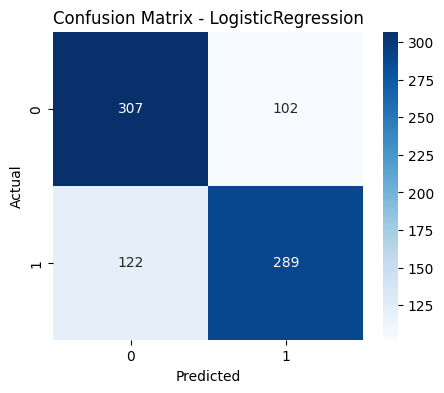


=== DecisionTree ===
Test Accuracy: 67.80%
Precision: 68.42% | Recall: 66.42% | F1: 67.41%
5-fold CV Accuracy (train): 62.56% (+/- 3.55%)

Classification report (test):
              precision    recall  f1-score   support

           0     0.6722    0.6919    0.6819       409
           1     0.6842    0.6642    0.6741       411

    accuracy                         0.6780       820
   macro avg     0.6782    0.6781    0.6780       820
weighted avg     0.6782    0.6780    0.6780       820



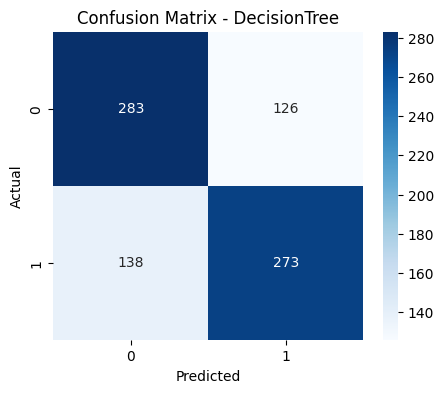


=== RandomForest ===
Test Accuracy: 77.56%
Precision: 78.73% | Recall: 75.67% | F1: 77.17%
5-fold CV Accuracy (train): 74.36% (+/- 1.34%)

Classification report (test):
              precision    recall  f1-score   support

           0     0.7647    0.7946    0.7794       409
           1     0.7873    0.7567    0.7717       411

    accuracy                         0.7756       820
   macro avg     0.7760    0.7757    0.7755       820
weighted avg     0.7761    0.7756    0.7755       820



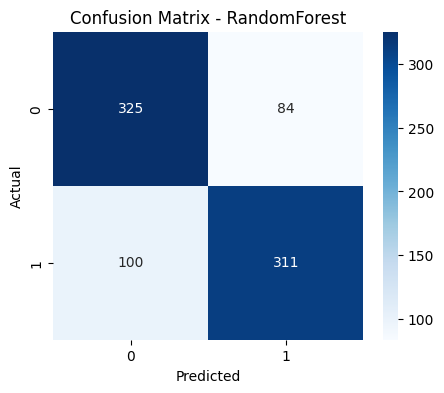


=== GradientBoosting ===
Test Accuracy: 85.37%
Precision: 86.65% | Recall: 83.70% | F1: 85.15%
5-fold CV Accuracy (train): 82.16% (+/- 1.04%)

Classification report (test):
              precision    recall  f1-score   support

           0     0.8416    0.8704    0.8558       409
           1     0.8665    0.8370    0.8515       411

    accuracy                         0.8537       820
   macro avg     0.8541    0.8537    0.8536       820
weighted avg     0.8541    0.8537    0.8536       820



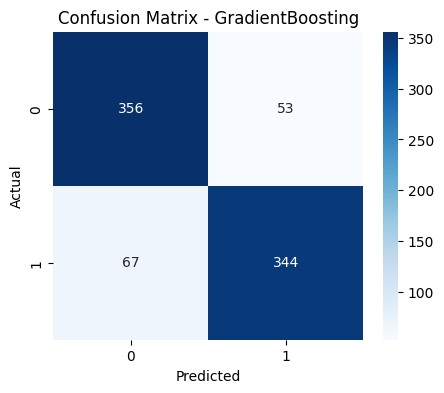


Model comparison (test metrics):

Model comparison (test metrics):

Model comparison (test metrics):

Model comparison (test metrics):

Model comparison (test metrics):
                model accuracy precision  recall      f1 cv_mean_acc
3    GradientBoosting   85.37%    86.65%   83.7%  85.15%      82.16%
2        RandomForest   77.56%    78.73%  75.67%  77.17%      74.36%
0  LogisticRegression   72.68%    73.91%  70.32%  72.07%      71.19%
1        DecisionTree    67.8%    68.42%  66.42%  67.41%      62.56%


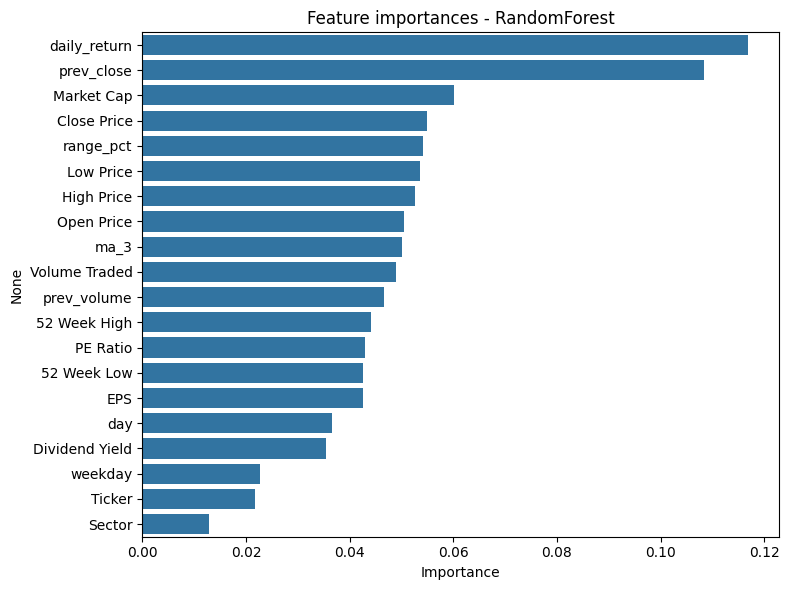

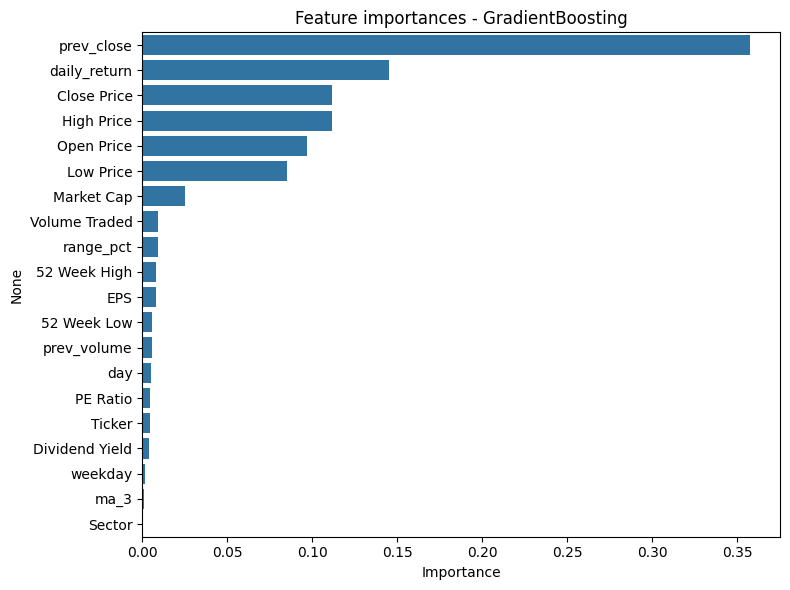

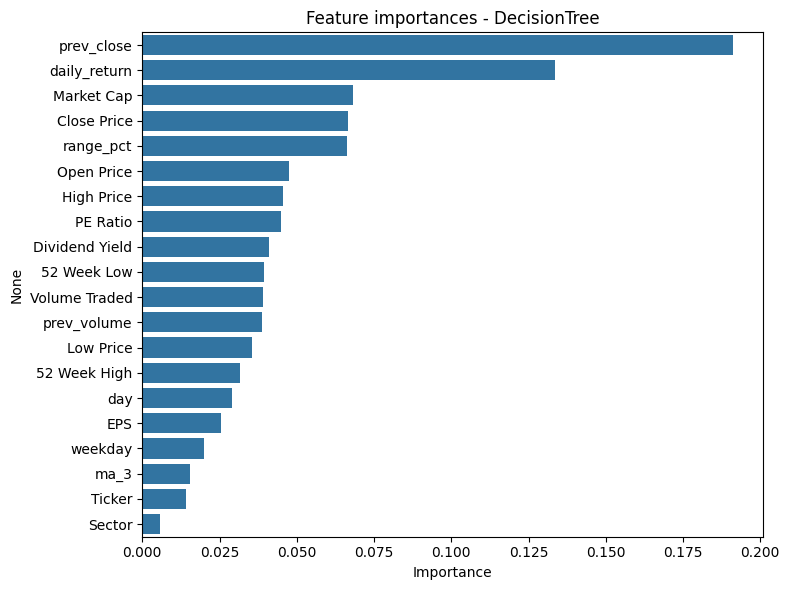

In [18]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
    results.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'cv_mean_acc': cv_scores.mean()
    })

    print(f"\n=== {name} ===")
    print(f"Test Accuracy: {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}% | Recall: {rec*100:.2f}% | F1: {f1*100:.2f}%")
    print(f"5-fold CV Accuracy (train): {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")
    print("\nClassification report (test):")
    print(classification_report(y_test, y_pred, digits=4))
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
res_df = pd.DataFrame(results).sort_values('accuracy', ascending=False)
res_df_display = res_df.copy()
for col in ['accuracy', 'precision', 'recall', 'f1', 'cv_mean_acc']:
    res_df_display[col] = (res_df_display[col] * 100).round(2).astype(str) + '%'
    print("\nModel comparison (test metrics):")
print(res_df_display[['model','accuracy','precision','recall','f1','cv_mean_acc']])
for tree_model_name in ['RandomForest', 'GradientBoosting', 'DecisionTree']:
    if tree_model_name in models:
        m = models[tree_model_name]
        if hasattr(m, 'feature_importances_'):
            fi = pd.Series(m.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
            plt.figure(figsize=(8,6))
            sns.barplot(x=fi.values, y=fi.index)
            plt.title(f'Feature importances - {tree_model_name}')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()